# Advanced programming for data science 2612

## Preparation exam, practical component

* This is the practical part of an example exam for the course, with a similar structure to what you will encounter on the day of examination.
* The exam will be accompanied by a quiz in Moodle.
* The quiz will test the more theoretical elements of the course.
* The quiz will a similar structure to previous quizes, although longer: 12 questions.
* The total duration of the exam is shared between quiz and this component.

---
<div class="alert alert-danger">
    <b>Make sure you have the following packages: numpy, matplotlib, pandas, seaborn, pytest.<b>
</div>

---

## Welcome to micro project Icaras!

Icaras is an anti-gravity racing team that is looking to win the FX450 anti-gravity racing league nest year. They need a data scientist to crunch some numbers and improve their craft's maximum speed. The mechanics ran some tests through the past weeks and give you the data they collected.

The data you receive is the following:

* cochranes: a measure of warp field distortion.
* warp-ratio: ratio between the discombombulator and the sammoflange tolerance.
* engine-size: manifold engine volume, adjusted for Belmondo space-compression.
* compression-ratio: warp field compression equivalent of Casimir's force tested in a standard Montgomery scenario.
* thrust: Thrust as normally defined.
* peak-kph: top speed.
* fuel-consumption: quantum depletion of the fuel cell in 1 over Planck's constant multiples per second times Daytrom's parameter.
* test_day: date of the test for the configuration.

Although you are not an anti-gravity expert, you know your way around data.

The dataset for the tests is in the __drive_design_tests.csv__ file. With it, you are going to discover some findings about optimal engine configuration.

---
## 1-Data reading

1. Import pandas, numpy, and matpotlib.
1. Read the dataset into a pandas dataframe. Does the data format look correct? Try to read pandas' documentation to check what parameter you need to delimit the data.
1. Convert the date column into datetime. Set it as the index of the matrix. Plot any technical parameter over time with the datetime index.
1. Print the head() of the transformed dataframe.

## 2-Initial data exploration

1. Do a correlation matrix. What are the highest and lowest correlated pair of distinct variables?
1. Do a pairplot (from Seaborn) of the dataframe. The pairplot and the correlation matrix should tell you which are the highest and most anti-correlated variables. An engineer tells you the parameter in need of more optimization is the __Cochranes__ parameter. Write down the variables corresponding to the lowest and highest correlation with the __Cochranes__ parameter.

## 3-Additional data exploration
1. Build a class called "Feisar". The class should be initialized in the \_\_init\_\_ method with the name of the file with the tests as a default str parameter. Make a simple one-line docstring for the class with a generic remark.
1. The \_\_init\_\_ method should read and clean the dataframe like you did in step 1. The dataframe should now be a parameter of class Feisar.
1. Add a function called __scatter()__ to the class that receives two strings. The strings correspond to the columns of the datafame.
1. The function __scatter__ must plot a scatter plot of the chosen columns.
1. The function __scatter__ should __raise__ on two occasions: 1) A ValueError if the two columns are identical (with an appropriate message) and 2) if one of the columns is not a string (again, with an appropriate message).
1. Run the function three times, once for each combination of __Cochranes__ and the other two parameters.

## 4-Hardening the process
1. Write a small test for the __scatter__ function. The test should __Pass__ if the function __raise__ a TypeError if it receives an __int__. (If you run the test on the notebook, the test passes if it returns nothing. If you input two strings you should get a python error)

## 5-Finding the recipe
1. After discussing with a physicist, you find the textbook definition for __efficiency__. The formula is: $$\frac{cochranes^2 \times fuel-consumption}{engine-size}$$
1. Add an __efficiency__ method to the class. The method receives no input. Inside the method, calculate the efficiency, and make a scatter plot where __cochranes__ is in the x-axis and __efficiency__ is the y-axis.
1. Find out what's the the most efficient engine configuration and write it down.

Maybes Icaras wins the League thanks to your efforts next year.

---
# Proposed Resolution

## 1 - Data Reading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Also importted seaborn to make the plots easier

In [2]:
df = pd.read_csv("drive_design_tests.csv")
df.head()

,cochranes;warp-ratio;engine-size;compression-ratio;thrust;peak-kph;fuel-consumption;test_day
0,2975;4.0;146;9.3;116;4800;30;18/08/2257
1,1989;4.0;90;9.4;68;5500;38;30/06/2257
2,2326;4.0;122;8.7;92;4200;34;19/08/2257
3,2191;4.0;98;9.4;68;5500;38;01/07/2257
4,2040;4.0;92;9.0;62;4800;38;28/07/2257


It seems the dataframe file does not thave the usual "," delimiter. The delimiter is actually ";". Let's read the file with the correct delimiter.

In [3]:
df = pd.read_csv("drive_design_tests.csv", delimiter=";")

In [4]:
df.head()

,cochranes,warp-ratio,engine-size,compression-ratio,thrust,peak-kph,fuel-consumption,test_day
0,2975,4.0,146,9.3,116,4800,30,18/08/2257
1,1989,4.0,90,9.4,68,5500,38,30/06/2257
2,2326,4.0,122,8.7,92,4200,34,19/08/2257
3,2191,4.0,98,9.4,68,5500,38,01/07/2257
4,2040,4.0,92,9.0,62,4800,38,28/07/2257


Much better! Let's convert the "test_day" column into datetime.

In [5]:
df['test_day'] = pd.to_datetime(df['test_day'])

In [6]:
df.head()

,cochranes,warp-ratio,engine-size,compression-ratio,thrust,peak-kph,fuel-consumption,test_day
0,2975,4.0,146,9.3,116,4800,30,2257-08-18
1,1989,4.0,90,9.4,68,5500,38,2257-06-30
2,2326,4.0,122,8.7,92,4200,34,2257-08-19
3,2191,4.0,98,9.4,68,5500,38,2257-01-07
4,2040,4.0,92,9.0,62,4800,38,2257-07-28


In [7]:
df.dtypes

cochranes                     int64
warp-ratio                  float64
engine-size                   int64
compression-ratio           float64
thrust                        int64
peak-kph                      int64
fuel-consumption              int64
test_day             datetime64[ns]
dtype: object

The "test_day" columns is now datetime. We will convert it into the index and choose any technical parameter fo plot.

In [8]:
df.set_index("test_day", inplace=True)

<AxesSubplot:xlabel='test_day'>

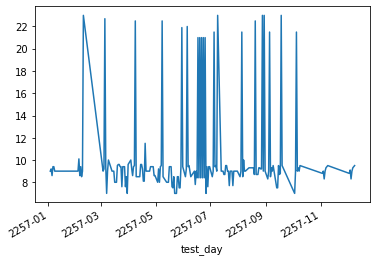

In [9]:
df['compression-ratio'].plot()

If the datetime conversion and index_setting worked, re-arranging the index will not affect the plot.

In [10]:
df.sort_index(inplace=True)

<AxesSubplot:xlabel='test_day'>

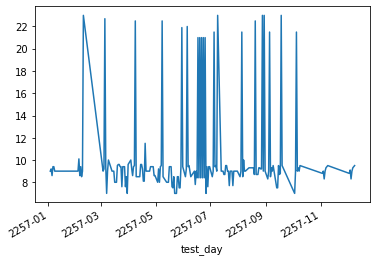

In [11]:
df['compression-ratio'].plot()

In [12]:
df.head() ## Printing the head as requested

,cochranes,warp-ratio,engine-size,compression-ratio,thrust,peak-kph,fuel-consumption
test_day,,,,,,,
2257-01-03,2548,4.0,130,9.0,111,5000,27
2257-01-04,1819,4.0,92,9.2,76,6000,38
2257-01-05,2385,4.0,122,8.6,84,4800,32
2257-01-06,1938,4.0,97,9.4,69,5200,37
2257-01-07,2191,4.0,98,9.4,68,5500,38


---
## 2 - Initial data exploration

Do a correlation matrix. What are the highest and lowest correlated pair of distinct variables?
Do a pairplot (from Seaborn) of the dataframe. The pairplot and the correlation matrix should tell you which are the highest and most anti-correlated variables. An engineer tells you the parameter in need of more optimization is the Cochranes parameter. Write down the variables corresponding to the lowest and highest correlation with the Cochranes parameter.

In [13]:
df.corr() ## If this matrix is too big, I wouldn't be able to identify the values I want:

,cochranes,warp-ratio,engine-size,compression-ratio,thrust,peak-kph,fuel-consumption
cochranes,1.000000,0.609913,0.850816,0.151225,0.751034,-0.266306,-0.797515
warp-ratio,0.609913,1.000000,0.847039,-0.021295,0.691633,-0.124434,-0.466829
engine-size,0.850816,0.847039,1.000000,0.029432,0.810773,-0.244618,-0.677568
compression-ratio,0.151225,-0.021295,0.029432,1.000000,-0.205874,-0.436221,0.265506
thrust,0.751034,0.691633,0.810773,-0.205874,1.000000,0.130971,-0.770908
peak-kph,-0.266306,-0.124434,-0.244618,-0.436221,0.130971,1.000000,-0.054257
fuel-consumption,-0.797515,-0.466829,-0.677568,0.265506,-0.770908,-0.054257,1.000000


In [14]:
correlation_matrix = df.corr()

In [15]:
correlation_matrix

,cochranes,warp-ratio,engine-size,compression-ratio,thrust,peak-kph,fuel-consumption
cochranes,1.000000,0.609913,0.850816,0.151225,0.751034,-0.266306,-0.797515
warp-ratio,0.609913,1.000000,0.847039,-0.021295,0.691633,-0.124434,-0.466829
engine-size,0.850816,0.847039,1.000000,0.029432,0.810773,-0.244618,-0.677568
compression-ratio,0.151225,-0.021295,0.029432,1.000000,-0.205874,-0.436221,0.265506
thrust,0.751034,0.691633,0.810773,-0.205874,1.000000,0.130971,-0.770908
peak-kph,-0.266306,-0.124434,-0.244618,-0.436221,0.130971,1.000000,-0.054257
fuel-consumption,-0.797515,-0.466829,-0.677568,0.265506,-0.770908,-0.054257,1.000000


This next step is not necessary, it just serves as a visual aid.

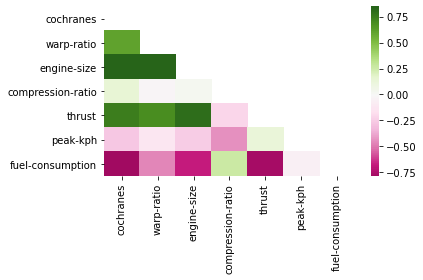

In [16]:
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation_matrix, mask=mask, cmap='PiYG', center=0, robust=True)

# Auto-compose the image
plt.tight_layout()
plt.show()

If it is too hard to spot visually, the trick is to look for "pandas correlation matrix minimum pair" on google. The first Stack-Overflow post may have your answer.

In [17]:
sort_corr = correlation_matrix.unstack()
so = sort_corr.sort_values(kind="quicksort")

In [18]:
so ## Again, a large list

fuel-consumption   cochranes           -0.797515
cochranes          fuel-consumption    -0.797515
fuel-consumption   thrust              -0.770908
thrust             fuel-consumption    -0.770908
engine-size        fuel-consumption    -0.677568
fuel-consumption   engine-size         -0.677568
                   warp-ratio          -0.466829
warp-ratio         fuel-consumption    -0.466829
peak-kph           compression-ratio   -0.436221
compression-ratio  peak-kph            -0.436221
cochranes          peak-kph            -0.266306
peak-kph           cochranes           -0.266306
                   engine-size         -0.244618
engine-size        peak-kph            -0.244618
thrust             compression-ratio   -0.205874
compression-ratio  thrust              -0.205874
peak-kph           warp-ratio          -0.124434
warp-ratio         peak-kph            -0.124434
fuel-consumption   peak-kph            -0.054257
peak-kph           fuel-consumption    -0.054257
warp-ratio         c

In [19]:
so[so == so.min()] ## Filter the dataframe for the minimum pair, which is easy

fuel-consumption  cochranes          -0.797515
cochranes         fuel-consumption   -0.797515
dtype: float64

For the maximum, you need the remove the self-correlations.

In [20]:
so_minusones = so[so != 1]

#so[so[so.values != 1] == so.max()]

In [21]:
so_minusones[so_minusones == so_minusones.max()]

engine-size  cochranes      0.850816
cochranes    engine-size    0.850816
dtype: float64

So the most anti-correlated parameters are fuel-consumption and cochranes. The most correlated pais is cochranes and engine-size. For the pairplot, we can just do:

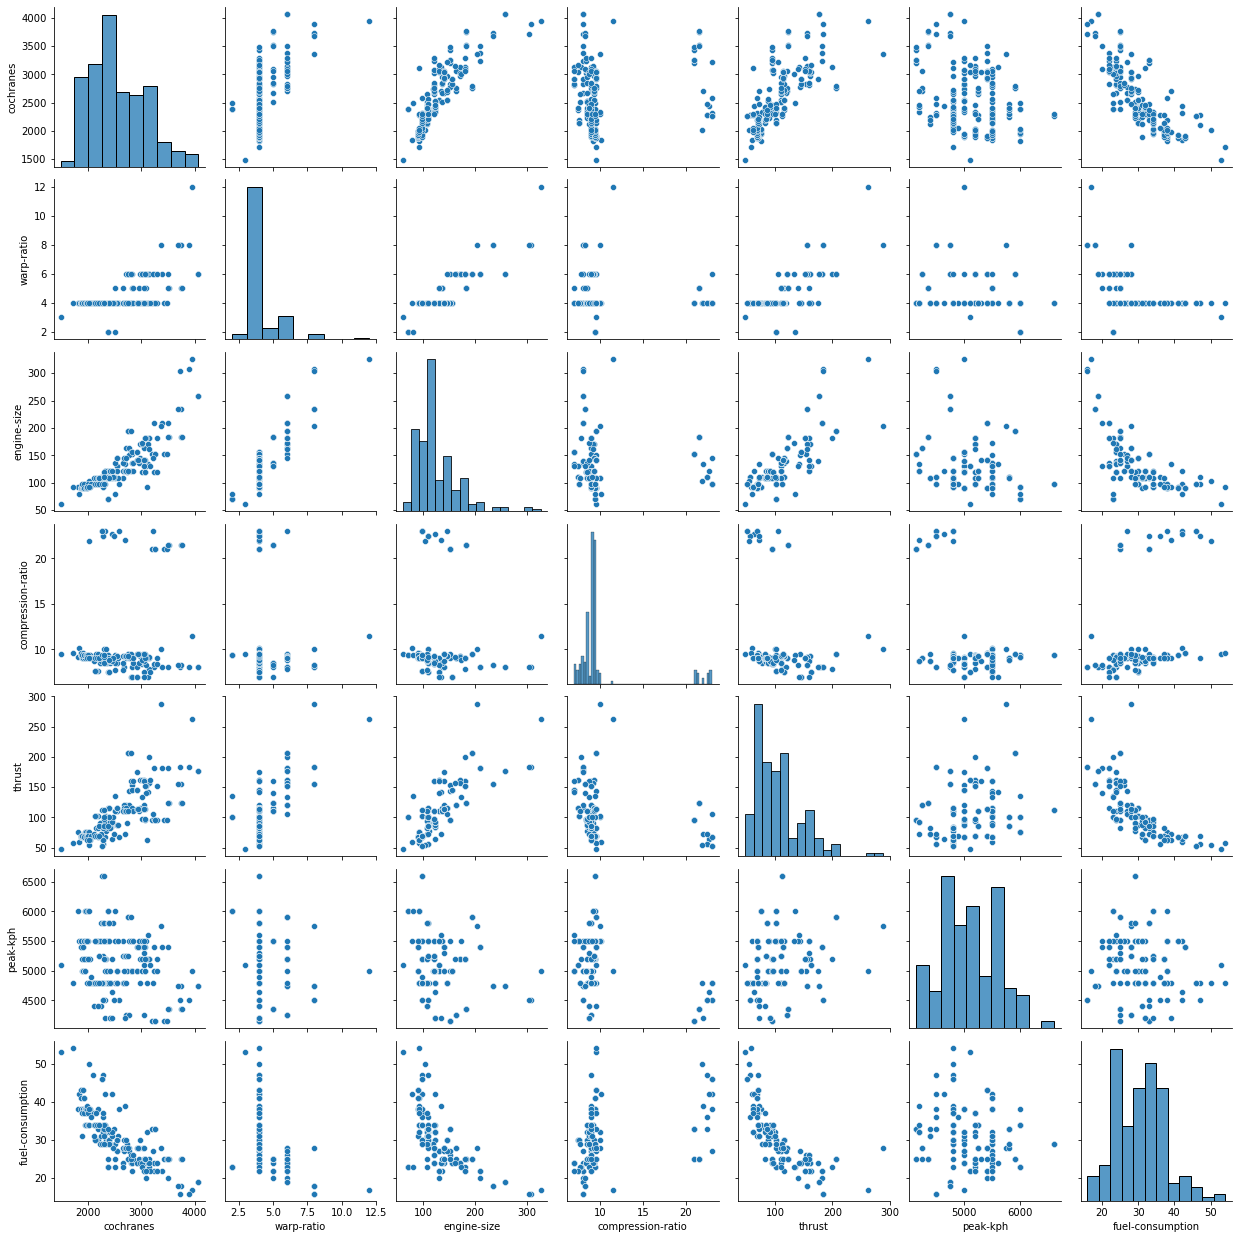

In [22]:
sns.pairplot(df)

As we can see again, bot not so clearly, the pair (cochranes, engine-size) is the most correlated and (cochranes, fuel-consumption) is the most anti-correlated.

---
## 3-Additional data exploration

In [7]:
class Feisar():
    "Class to analyse Icaras data with a scatter() method"
    ## Don't waste time with documentation on the exam if only one-line documentation is required
    ## You had the project to do that
    
    def __init__(self, file_name='drive_design_tests.csv', delimiter=';'): ## The delimiter is just an extra touch
        self.df = pd.read_csv(file_name, delimiter=delimiter)
        
    def scatter(self, col1, col2):
        "Plots a scatter plot of two chosen columns"
        if type(col1) != str:
            raise TypeError("Variable col1 is not str!")
        if type(col2) != str:
            raise TypeError("Variable col2 is not str!")
        if col1 == col2:
            raise ValueError("Variable col1 and col2 must be different")
                                    
        sns.scatterplot(x=col1, y=col2, data=self.df)
        plt.show()

In [8]:
icaras = Feisar()

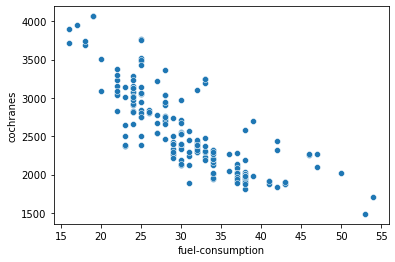

In [9]:
icaras.scatter("fuel-consumption", "cochranes")

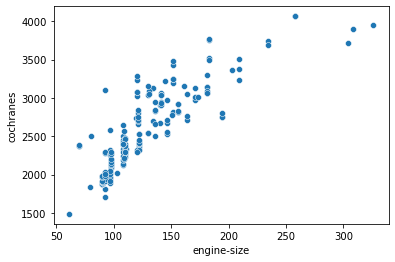

In [26]:
icaras.scatter("engine-size", "cochranes")

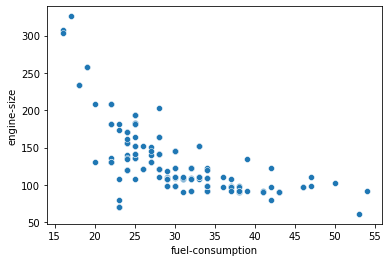

In [27]:
icaras.scatter("fuel-consumption", "engine-size")

---
## 4-Hardening the process

In [28]:
import pytest

In [29]:
def test_one():
    with pytest.raises(TypeError):
        icaras.scatter(1, "cochranes")

## RUN THE TEST!        
test_one()
## No output on a Notebook means the test passed. Make a new test that fails on purpose to make sure it is working

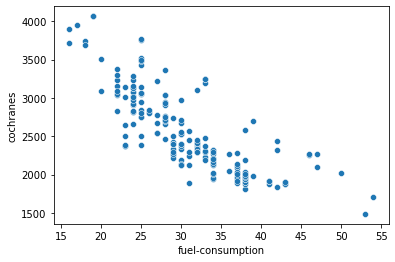

Failed: DID NOT RAISE <class 'TypeError'>

In [30]:
def test_two():
    with pytest.raises(TypeError):
        icaras.scatter("fuel-consumption", "cochranes")

test_two()

The new test failed because we gave the function a condition where the __raise__ is not verified. So the first test is working!

---
## 5-Finding the recipe

It's easier if we just copy the class here, since it is small. It is OK if you alter the previous class definition. Please make a note of what version you'rs using now.

In [10]:
## Using this class from now on
class Feisar():
    "Class to analyse Icaras data with a scatter() and an efficiency() method"
    ## Don't waste time with documentation on the exam if only one-line documentation is required
    ## You had the project to do that
    
    def __init__(self, file_name='drive_design_tests.csv', delimiter=';'): ## The delimiter is just an extra touch
        self.df = pd.read_csv(file_name, delimiter=delimiter)
        
    def scatter(self, col1, col2):
        "Plots a scatter plot of two chosen columns"
        if type(col1) != str:
            raise TypeError("Variable col1 is not str!")
        if type(col2) != str:
            raise TypeError("Variable col2 is not str!")
        if col1 == col2:
            raise ValueError("Variable col1 and col2 must be different")
            
        sns.scatterplot(x=col1, y=col2, data=self.df)
        plt.show()
            
    def efficiency(self):
        "Calculates and plots the efficiency of the engine configuration"
        
        self.df["efficiency"] = self.df["cochranes"]**2 * self.df["fuel-consumption"] / self.df["engine-size"]
        
        sns.scatterplot(x='cochranes', y="efficiency", data=self.df)
        
        plt.show()

In [11]:
auricom = Feisar()

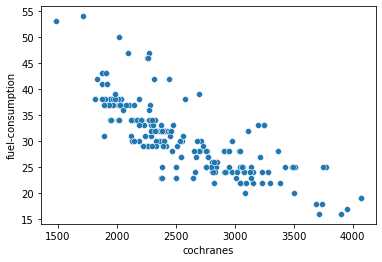

In [14]:
auricom.scatter("cochranes", "fuel-consumption")

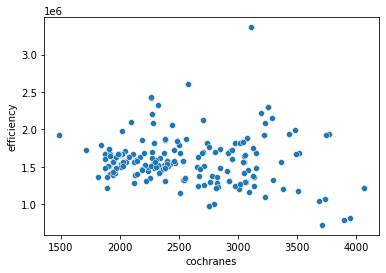

In [15]:
auricom.efficiency()

There is a clear data point with a higher efficiency. Let's find the optimal engine configuration for maximum efficiency on our dataset.

In [34]:
auricom.df.loc[auricom.df['efficiency'].argmax(), :]

cochranes                   3110
warp-ratio                     4
engine-size                   92
compression-ratio              9
thrust                        62
peak-kph                    4800
fuel-consumption              32
test_day              01/08/2257
efficiency           3.36421e+06
Name: 64, dtype: object

Although it is not the fastest configuration, this is clearly the best configuration, following the textbook definition.